# Divizija


In [1]:
from IPython import *
from IPython.display import *


In [2]:
import copy
import math
import numbers
import time


In [3]:
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D


In [4]:
import shapely as sh
import shapely.geometry as gm


In [5]:
%matplotlib inline


In [6]:
sym.init_printing()


In [7]:
df = pd.read_csv(
    'data/triangles/complete.tsv',
    sep = "\t",
    header = 0,
    index_col = None
)


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129448 entries, 0 to 1129447
Data columns (total 19 columns):
x_0           1129448 non-null float64
y_0           1129448 non-null float64
x_1           1129448 non-null float64
y_1           1129448 non-null float64
x_2           1129448 non-null float64
y_2           1129448 non-null float64
a             1129448 non-null float64
c             1129448 non-null float64
b             1129448 non-null float64
alpha         1129448 non-null float64
gamma         1129448 non-null float64
beta          1129448 non-null float64
sv_edge_0     1129448 non-null float64
sv_edge_1     1129448 non-null float64
sv_edge_2     1129448 non-null float64
sv_angle_0    1129448 non-null float64
sv_angle_1    1129448 non-null float64
sv_angle_2    1129448 non-null float64
l_0           1129448 non-null float64
dtypes: float64(19)
memory usage: 163.7 MB


In [9]:
(df.l_0.min(), df.l_0.max())


In [10]:
df.loc[np.abs(df.l_0 - df.l_0.min()) < 0.1]


,x_0,y_0,x_1,y_1,x_2,y_2,a,c,b,alpha,gamma,beta,sv_edge_0,sv_edge_1,sv_edge_2,sv_angle_0,sv_angle_1,sv_angle_2,l_0
1630,0.5,0.0,0.0000,0.865026,-0.5,0.0,1.0,0.999135,0.999135,2.093395,2.094895,2.094895,4.240193,0.001224,0.001224,8.885766,0.002122,0.002122,52.790165
1631,0.5,0.0,0.0000,0.865526,-0.5,0.0,1.0,0.999567,0.999567,2.093895,2.094645,2.094645,4.241417,0.000612,0.000612,8.885766,0.001061,0.001061,52.779327
1632,0.5,0.0,0.0000,0.866025,-0.5,0.0,1.0,1.000000,1.000000,2.094395,2.094395,2.094395,4.242641,0.000000,0.000000,8.885766,0.000000,0.000000,52.724820
3262,0.5,0.0,0.0005,0.864526,-0.5,0.0,1.0,0.998952,0.998452,2.092894,2.094712,2.095579,4.238970,0.001935,0.001935,8.885766,0.003356,0.003356,52.816303
3263,0.5,0.0,0.0005,0.865026,-0.5,0.0,1.0,0.999385,0.998884,2.093395,2.094462,2.095328,4.240193,0.001369,0.001369,8.885766,0.002372,0.002372,52.814851
3264,0.5,0.0,0.0005,0.865526,-0.5,0.0,1.0,0.999817,0.999317,2.093895,2.094212,2.095078,4.241417,0.000866,0.000866,8.885766,0.001500,0.001500,52.772876
4895,0.5,0.0,0.0010,0.865026,-0.5,0.0,1.0,0.999635,0.998635,2.093396,2.094028,2.095761,4.240194,0.001732,0.001732,8.885766,0.003000,0.003000,52.803360


In [11]:
df.loc[np.abs(df.l_0 - df.l_0.max()) < 100.0]


,x_0,y_0,x_1,y_1,x_2,y_2,a,c,b,alpha,gamma,beta,sv_edge_0,sv_edge_1,sv_edge_2,sv_angle_0,sv_angle_1,sv_angle_2,l_0
1128351,0.5,0.0,0.4925,0.050472,-0.5,0.0,1.0,0.993783,0.051027,1.474090,1.718313,3.090783,2.891797,1.337676,1.337676,8.885766,2.134717,2.134717,5737.629428
1128495,0.5,0.0,0.4930,0.050472,-0.5,0.0,1.0,0.994282,0.050955,1.483770,1.708607,3.090808,2.892402,1.338127,1.338127,8.885766,2.131573,2.131573,5745.374716
1128631,0.5,0.0,0.4935,0.050472,-0.5,0.0,1.0,0.994781,0.050889,1.493477,1.698875,3.090834,2.893015,1.338570,1.338570,8.885766,2.128682,2.128682,5753.146987
1128758,0.5,0.0,0.4940,0.050472,-0.5,0.0,1.0,0.995281,0.050828,1.503208,1.689118,3.090859,2.893634,1.339008,1.339008,8.885766,2.126047,2.126047,5760.946108
1128876,0.5,0.0,0.4945,0.050472,-0.5,0.0,1.0,0.995780,0.050771,1.512962,1.679339,3.090885,2.894260,1.339438,1.339438,8.885766,2.123672,2.123672,5768.771975
1128985,0.5,0.0,0.4950,0.050472,-0.5,0.0,1.0,0.996279,0.050719,1.522737,1.669538,3.090910,2.894893,1.339862,1.339862,8.885766,2.121560,2.121560,5776.624487
1129084,0.5,0.0,0.4955,0.050472,-0.5,0.0,1.0,0.996779,0.050673,1.532531,1.659719,3.090936,2.895533,1.340280,1.340280,8.885766,2.119713,2.119713,5784.503434
1129173,0.5,0.0,0.4960,0.050472,-0.5,0.0,1.0,0.997278,0.050631,1.542342,1.649882,3.090961,2.896180,1.340691,1.340691,8.885766,2.118134,2.118134,5792.408733
1129251,0.5,0.0,0.4965,0.050472,-0.5,0.0,1.0,0.997777,0.050594,1.552169,1.640030,3.090986,2.896834,1.341095,1.341095,8.885766,2.116826,2.116826,5800.340259
1129318,0.5,0.0,0.4970,0.050472,-0.5,0.0,1.0,0.998277,0.050561,1.562009,1.630165,3.091012,2.897495,1.341492,1.341492,8.885766,2.115790,2.115790,5808.297880


In [12]:
smp = pd.read_csv(
    'data/triangles/sample.tsv',
    sep = "\t",
    header = 0,
    index_col = None
)


In [13]:
smp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8165 entries, 0 to 8164
Data columns (total 19 columns):
x_0           8165 non-null float64
y_0           8165 non-null float64
x_1           8165 non-null float64
y_1           8165 non-null float64
x_2           8165 non-null float64
y_2           8165 non-null float64
a             8165 non-null float64
c             8165 non-null float64
b             8165 non-null float64
alpha         8165 non-null float64
gamma         8165 non-null float64
beta          8165 non-null float64
sv_edge_0     8165 non-null float64
sv_edge_1     8165 non-null float64
sv_edge_2     8165 non-null float64
sv_angle_0    8165 non-null float64
sv_angle_1    8165 non-null float64
sv_angle_2    8165 non-null float64
l_0           8165 non-null float64
dtypes: float64(19)
memory usage: 1.2 MB


In [14]:
m = int(df.x_1.unique().size)
n = int(df.y_1.unique().size)


In [15]:
(m, n)


In [16]:
x = np.load('data/triangles/x.npy')
y = np.load('data/triangles/y.npy')

X = np.load('data/triangles/X.npy')
Y = np.load('data/triangles/Y.npy')

l = np.load('data/triangles/l.npy')


In [17]:
(~np.isnan(l.ravel())).sum()


1129448

In [18]:
l_rav = smp.l_0.values.ravel().copy(order = 'F')
l_rav = l_rav[~np.isnan(l_rav)].copy(order = 'F')

lev = np.concatenate(
    (
        [min(l_rav.min(), df.l_0.min())],
        [np.quantile(l_rav, float(i) / 100.0) for i in range(5, 96, 5)],
        [max(l_rav.max(), df.l_0.max())]
    ))
try:
    del i
except (NameError, UnboundLocalError):
    pass
lev = np.array(
    lev,
    dtype = float,
    copy = True,
    order = 'F',
    subok = False,
    ndmin = 1
)

log10_lev = np.array(
    np.log10(lev),
    dtype = float,
    copy = True,
    order = 'F',
    subok = False,
    ndmin = 1
)

lev[0] -= 1.0e-8
lev[-1] += 1.0e-8
log10_lev[0] -= 1.0e-8
log10_lev[-1] += 1.0e-8

del l_rav


In [19]:
I = np.isnan(l)

#l[I] = 1.0e-16

X = np.ma.MaskedArray(X, mask = I)
Y = np.ma.MaskedArray(Y, mask = I)
l = np.ma.MaskedArray(l, mask = I)

del I


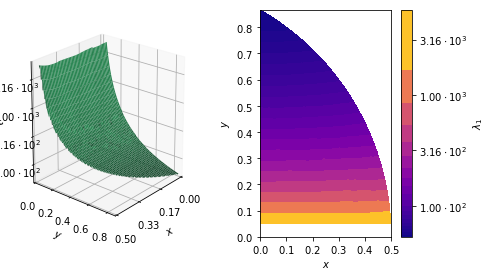

In [20]:
fig = plt.figure(num = 'Eigenvalues', figsize = (7.5, 4.171875))

ax0 = fig.add_subplot(121, projection = '3d')
ax1 = fig.add_subplot(122)

ax0.plot_surface(X, Y, np.log10(l.data), color = 'seagreen')
cs = ax1.contourf(X, Y, np.log10(l), levels = log10_lev, cmap = plt.cm.plasma)

ax0.view_init(20.0, 40.0)

ax1.set_aspect('equal')

ax0.set_xlabel("$ x $")
ax0.set_ylabel("$ y $")
ax0.set_zlabel("$ \lambda_{1} $")

ax0.set_xticks(
    [
        0.0,
        0.1666666666666666666666666666666666666666666666666666666666666667,
        0.3333333333333333333333333333333333333333333333333333333333333333,
        0.5
    ]
)
ax0.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8])
ax0.set_zticks([2.0, 2.5, 3.0, 3.5])

ax0.set_xticklabels(
    [
        "$ 0.00 $",
        "$ 0.17 $",
        "$ 0.33 $",
        "$ 0.50 $"
    ]
)
ax0.set_yticklabels(
    [
        "$ 0.0 $",
        "$ 0.2 $",
        "$ 0.4 $",
        "$ 0.6 $",
        "$ 0.8 $"
    ]
)
ax0.set_zticklabels(
    [
        "$ 1.00 \cdot 10^{2} $",
        "$ 3.16 \cdot 10^{2} $",
        "$ 1.00 \cdot 10^{3} $",
        "$ 3.16 \cdot 10^{3} $"
    ]
)

ax1.set_xlabel("$ x $")
ax1.set_ylabel("$ y $")

ax1.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
ax1.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

ax1.set_xticklabels(
    [
        "$ 0.0 $",
        "$ 0.1 $",
        "$ 0.2 $",
        "$ 0.3 $",
        "$ 0.4 $",
        "$ 0.5 $"
    ]
)
ax1.set_yticklabels(
    [
        "$ 0.0 $",
        "$ 0.1 $",
        "$ 0.2 $",
        "$ 0.3 $",
        "$ 0.4 $",
        "$ 0.5 $",
        "$ 0.6 $",
        "$ 0.7 $",
        "$ 0.8 $"
    ]
)

ax0.set_xlim((0.0, 0.5))
ax0.set_ylim(
    (
        0.0,
        0.8660254037844386467637231707529361834714026269051903140279034897
    )
)
ax0.set_zlim((float(np.log10(lev[0])), float(np.log10(lev[-1]))))

ax1.set_xlim((0.0, 0.5))
ax1.set_ylim(
    (
        0.0,
        0.8660254037844386467637231707529361834714026269051903140279034897
    )
)

cbar = fig.colorbar(
    cs,
    ax = ax1,
    ticks = [2.0, 2.5, 3.0, 3.5],
    spacing = 'proportional'
)

cbar.set_label("$ \lambda_{1} $")

cbar.ax.set_yticklabels(
    [
        "$ 1.00 \cdot 10^{2} $",
        "$ 3.16 \cdot 10^{2} $",
        "$ 1.00 \cdot 10^{3} $",
        "$ 3.16 \cdot 10^{3} $"
    ]
)

fig.savefig('../eigenvalues.pdf')

plt.show()


Formula je
$$ F \left( \lambda \right) = 172.64577327 \left( \lambda^{{- 1}} - 0.00892327 \right) \text{.} $$


In [21]:
def F (l):
    return 172.64577327 * (l ** -1 - 0.00892327)


In [22]:
n = sym.Symbol('n', integer = True, positive = True)


In [23]:
(10 * 4 * 3 * n).subs({n : 500})


In [24]:
quants = tuple(
    df.loc[(df.l_0 >= lev[i]) & (df.l_0 < lev[i + 1])].copy(deep = True)
        for i in range(int(lev.size) - 1)
)
try:
    del i
except (NameError, UnboundLocalError):
    pass


In [25]:
def generate_subdf (quants, n, N_ITER = 1000, ok = 1.0e-3, err_f = max):
    subdf = list()
    E_min = list()

    for i in range(len(quants)):
        subdf.append(quants[i].copy(deep = True))
        E_min.append(float('inf'))

        std = {
            c : quants[i][c].std(ddof = 1) for c in quants[i].columns
        }
        try:
            del c
        except (NameError, UnboundLocalError):
            pass

        std = {
            c : std_c
              for c, std_c in std.items() if not np.isclose(1.0, 1.0 + std_c)
        }
        try:
            del c
        except (NameError, UnboundLocalError):
            pass
        try:
            del std_c
        except (NameError, UnboundLocalError):
            pass

        for j in range(N_ITER):
            aux = quants[i].loc[
                np.sort(np.random.choice(quants[i].index, n, replace = False))
            ]

            E = float(
                err_f(
                    tuple(
                        abs(aux[c].std(ddof = 1) / std_c - 1.0)
                            for c, std_c in std.items()
                    )
                )
            )
            try:
                del c
            except (NameError, UnboundLocalError):
                pass
            try:
                del std_c
            except (NameError, UnboundLocalError):
                pass

            if E < E_min[-1]:
                subdf[-1] = aux.copy(deep = True)
                E_min[-1] = E

            del E
            del aux

            if E_min[-1] < ok:
                break
        try:
            del j
        except (NameError, UnboundLocalError):
            pass

        del std
    try:
        del i
    except (NameError, UnboundLocalError):
        pass

    return (tuple(subdf), tuple(E_min))


In [26]:
subdf, E_min = generate_subdf(quants, 200)


In [27]:
E_min


In [28]:
df_sample = pd.concat(subdf, axis = 0).copy(deep = True)
df_sample.sort_index(axis = 1, inplace = True)


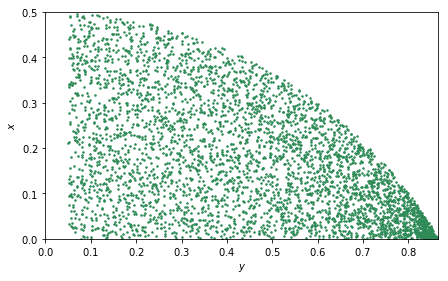

In [29]:
fig = plt.figure(num = 'Sample', figsize = (7.5, 4.171875))

ax = fig.add_subplot(111)

ax.plot(
    df_sample.y_1,
    df_sample.x_1,
    color = 'seagreen',
    linestyle = 'None',
    marker = '.',
    ms = 3
)

ax.set_aspect('equal')

ax.set_ylabel("$ x $")
ax.set_xlabel("$ y $")

ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
ax.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

ax.set_yticklabels(
    [
        "$ 0.0 $",
        "$ 0.1 $",
        "$ 0.2 $",
        "$ 0.3 $",
        "$ 0.4 $",
        "$ 0.5 $"
    ]
)
ax.set_xticklabels(
    [
        "$ 0.0 $",
        "$ 0.1 $",
        "$ 0.2 $",
        "$ 0.3 $",
        "$ 0.4 $",
        "$ 0.5 $",
        "$ 0.6 $",
        "$ 0.7 $",
        "$ 0.8 $"
    ]
)

ax.set_ylim((0.0, 0.5))
ax.set_xlim(
    (
        0.0,
        0.8660254037844386467637231707529361834714026269051903140279034897
    )
)

fig.savefig('../sample.pdf')

plt.show()


In [30]:
def rainbow (n):
    # Initialise the array of colours to zeros.  The array is of shape (`n`, 3)
    # so that `col[i]` defines the colour in the RGB format (in the range
    # [0, 1]) of the `i`-th region.
    col = np.zeros((n, 3), dtype = float, order = 'F')

    # Compute colours.

    # Get the number of regions increased by 1 in the `float` type.
    C = float(n + 1)

    # Iterate over colours.
    for i in range(n):
        # Get the position of the current colour in spectrum.
        c = 6.0 * float(i) / C

        # Set the RGB values of the current colour according to the position
        # `c`.
        if c < 1.0:
            col[i, 0] = 1.0
            col[i, 1] = c - 0.0
            col[i, 2] = 0.0
        elif c < 2.0:
            col[i, 0] = 2.0 - c
            col[i, 1] = 1.0
            col[i, 2] = 0.0
        elif c < 3.0:
            col[i, 0] = 0.0
            col[i, 1] = 1.0
            col[i, 2] = c - 2.0
        elif c < 4.0:
            col[i, 0] = 0.0
            col[i, 1] = 4.0 - c
            col[i, 2] = 1.0
        elif c < 5.0:
            col[i, 0] = c - 4.0
            col[i, 1] = 0.0
            col[i, 2] = 1.0
        else:
            col[i, 0] = 1.0
            col[i, 1] = 0.0
            col[i, 2] = 6.0 - c

        # Free the memory.
        del c

    # Free the memory.
    try:
        del i
    except (NameError, UnboundLocalError):
        pass
    del C

    # Return the generated rainbow.
    return col


In [31]:
y_quant = np.concatenate(
    (
        [df_sample.y_1.min()],
        [np.quantile(df_sample.y_1, float(i) / 100.0) for i in range(5, 96, 5)],
        [df_sample.y_1.max()]
    ))
try:
    del i
except (NameError, UnboundLocalError):
    pass
y_quant = np.array(
    y_quant,
    dtype = float,
    copy = True,
    order = 'F',
    subok = False,
    ndmin = 1
)

y_quant[0] -= 1.0e-8
y_quant[-1] += 1.0e-8


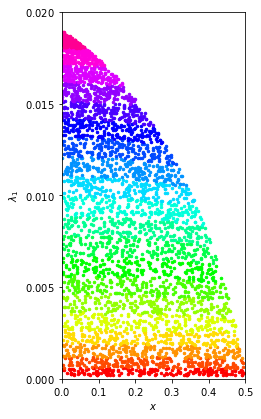

In [32]:
fig = plt.figure(num = 'Sample: x, lambda_0', figsize = (3.796875, 6.75))

ax = fig.add_subplot(111)

ax.set_aspect(50.0)

col = rainbow(int(y_quant.size) - 1)

for i in range(int(y_quant.size) - 1):
    I = (df_sample.y_1 >= y_quant[i]) & (df_sample.y_1 < y_quant[i + 1])

    ax.plot(
        df_sample.loc[I, 'x_1'],
        df_sample.loc[I, 'l_0'] ** -1,
        color = col[i],
        linestyle = 'None',
        marker = '.',
        ms = 5
    )

    del I
try:
    del i
except (NameError, UnboundLocalError):
    pass

del col

ax.set_xlabel("$ x $")
ax.set_ylabel("$ \lambda_{1} $")

ax.set_xticks((0.0, 0.1, 0.2, 0.3, 0.4, 0.5))
ax.set_yticks((0.000, 0.005, 0.010, 0.015, 0.020))

ax.set_xticklabels(
    (
        "$ 0.0 $",
        "$ 0.1 $",
        "$ 0.2 $",
        "$ 0.3 $",
        "$ 0.4 $",
        "$ 0.5 $"
    )
)
ax.set_yticklabels(
    (
        "$ 0.000 $",
        "$ 0.005 $",
        "$ 0.010 $",
        "$ 0.015 $",
        "$ 0.020 $"
    )
)

ax.set_xlim((0.0, 0.5))
ax.set_ylim((0.0, 0.02))

fig.savefig('../x-lambda.pdf')

plt.show()


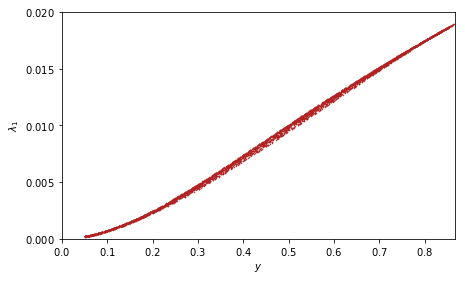

In [33]:
fig = plt.figure(num = 'Sample: y, lambda_0', figsize = (7.5, 4.171875))

ax = fig.add_subplot(111)

ax.set_aspect(25.0)

ax.plot(
    df_sample.y_1,
    df_sample.l_0 ** -1,
    color = 'firebrick',
    linestyle = 'None',
    marker = '.',
    ms = 1
)

ax.set_xlabel("$ y $")
ax.set_ylabel("$ \lambda_{1} $")

ax.set_xticks((0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8))
ax.set_yticks((0.000, 0.005, 0.010, 0.015, 0.020))

ax.set_xticklabels(
    (
        "$ 0.0 $",
        "$ 0.1 $",
        "$ 0.2 $",
        "$ 0.3 $",
        "$ 0.4 $",
        "$ 0.5 $",
        "$ 0.6 $",
        "$ 0.7 $",
        "$ 0.8 $"
    )
)
ax.set_yticklabels(
    (
        "$ 0.000 $",
        "$ 0.005 $",
        "$ 0.010 $",
        "$ 0.015 $",
        "$ 0.020 $"
    )
)

ax.set_xlim(
    (
        0.0,
        0.8660254037844386467637231707529361834714026269051903140279034897
    )
)
ax.set_ylim((0.0, 0.02))

fig.savefig('../y-lambda.pdf')

plt.show()


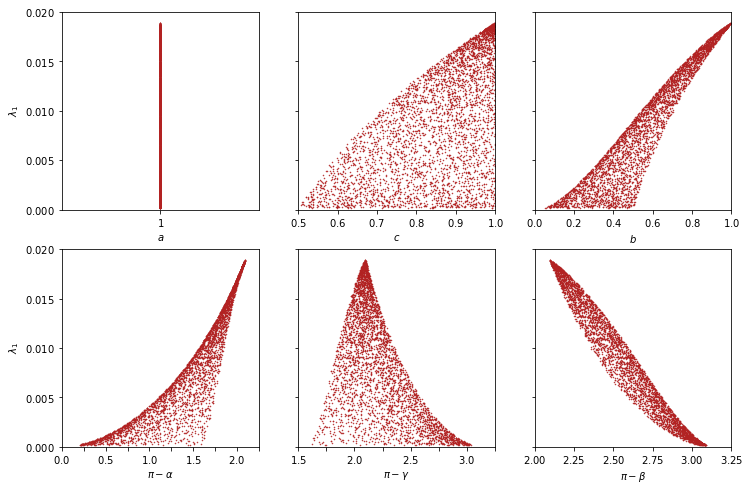

In [34]:
fig, ax = plt.subplots(
    num = 'Sample: edges/angles, lambda_0',
    figsize = (12.0, 8.0),
    nrows = 2,
    ncols = 3,
    sharex = False,
    sharey = True
)

edge = ('a', 'c', 'b')
angle = ('alpha', 'gamma', 'beta')

lim = (
    (
        (0.0, 2.0),
        (0.5, 1.0),
        (0.0, 1.0)
    ),
    (
        (0.00, 2.25),
        (1.50, 3.25),
        (2.00, 3.25)
    )
)

ticks = (
    (
        tuple([1.0]),
        (0.5, 0.6, 0.7, 0.8, 0.9, 1.0),
        (0.0, 0.2, 0.4, 0.6, 0.8, 1.0)
    ),
    (
        (
            0.00,
            0.25,
            0.50,
            0.75,
            1.00,
            1.25,
            1.50,
            1.75,
            2.00,
            2.25
        ),
        (1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25),
        (2.00, 2.25, 2.50, 2.75, 3.00, 3.25)
    )
)

ticklabels = (
    (
        tuple(["$ 1 $"]),
        (
            "$ 0.5 $",
            "$ 0.6 $",
            "$ 0.7 $",
            "$ 0.8 $",
            "$ 0.9 $",
            "$ 1.0 $"
        ),
        (
            "$ 0.0 $",
            "$ 0.2 $",
            "$ 0.4 $",
            "$ 0.6 $",
            "$ 0.8 $",
            "$ 1.0 $"
        )
    ),
    (
        (
            "$ 0.0 $",
            str(),
            "$ 0.5 $",
            str(),
            "$ 1.0 $",
            str(),
            "$ 1.5 $",
            str(),
            "$ 2.0 $",
            str()
        ),
        (
            "$ 1.5 $",
            str(),
            "$ 2.0 $",
            str(),
            "$ 2.5 $",
            str(),
            "$ 3.0 $",
            str()
        ),
        (
            "$ 2.00 $",
            "$ 2.25 $",
            "$ 2.50 $",
            "$ 2.75 $",
            "$ 3.00 $",
            "$ 3.25 $"
        )
    )
)

for i in range(3):
    ax[0, i].plot(
        df_sample[edge[i]],
        df_sample.l_0 ** -1,
        color = 'firebrick',
        linestyle = 'None',
        marker = '.',
        ms = 1
    )

    ax[0, i].set_xlabel("$ {e:s} $".format(e = edge[i]))
try:
    del i
except (NameError, UnboundLocalError):
    pass

for i in range(3):
    ax[1, i].plot(
        df_sample[angle[i]],
        df_sample.l_0 ** -1,
        color = 'firebrick',
        linestyle = 'None',
        marker = '.',
        ms = 1
    )

    ax[1, i].set_xlabel("$ \\pi - \\{a:s} $".format(a = angle[i]))
try:
    del i
except (NameError, UnboundLocalError):
    pass

for i in range(2):
    ax[i, 0].set_ylabel("$ \\lambda_{1} $")
try:
    del i
except (NameError, UnboundLocalError):
    pass

for i in range(2):
    for j in range(3):
        ax[i, j].set_xticks(ticks[i][j])
        ax[i, j].set_yticks((0.000, 0.005, 0.010, 0.015, 0.020))

        ax[i, j].set_xticklabels(ticklabels[i][j])
        ax[i, j].set_yticklabels(
            (
                "$ 0.000 $",
                "$ 0.005 $",
                "$ 0.010 $",
                "$ 0.015 $",
                "$ 0.020 $"
            )
        )

        ax[i, j].set_xlim(lim[i][j])
        ax[i, j].set_ylim((0.0, 0.02))
    try:
        del j
    except (NameError, UnboundLocalError):
        pass
try:
    del i
except (NameError, UnboundLocalError):
    pass

del edge
del angle

del lim
del ticks
del ticklabels

fig.savefig('../edge_angle-lambda.pdf')

plt.show()


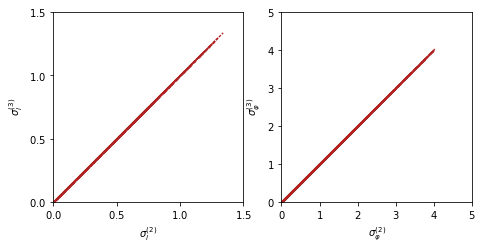

In [35]:
fig, ax = plt.subplots(
    num = 'Sample: singular values',
    figsize = (7.5, 4.171875),
    nrows = 1,
    ncols = 2
)

lim = ((0.0, 1.5), (0.0, 5.0))

ticks = (
    (0.0, 0.5, 1.0, 1.5),
    (0.0, 1.0, 2.0, 3.0, 4.0, 5.0)
)

ticklabels = (
    (
        "$ 0.0 $",
        "$ 0.5 $",
        "$ 1.0 $",
        "$ 1.5 $"
    ),
    (
        "$ 0 $",
        "$ 1 $",
        "$ 2 $",
        "$ 3 $",
        "$ 4 $",
        "$ 5 $"
    )
)

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

ax[0].plot(
    df_sample.sv_edge_1,
    df_sample.sv_edge_2,
    color = 'firebrick',
    linestyle = 'None',
    marker = '.',
    ms = 1
)
ax[1].plot(
    df_sample.sv_angle_1,
    df_sample.sv_angle_2,
    color = 'firebrick',
    linestyle = 'None',
    marker = '.',
    ms = 1
)

ax[0].set_xlabel("$ \\sigma_{l}^{\\left( 2 \\right)} $")
ax[0].set_ylabel("$ \\sigma_{l}^{\\left( 3 \\right)} $")

ax[1].set_xlabel("$ \\sigma_{\\varphi}^{\\left( 2 \\right)} $")
ax[1].set_ylabel("$ \\sigma_{\\varphi}^{\\left( 3 \\right)} $")

for i in range(2):
    ax[i].set_xticks(ticks[i])
    ax[i].set_yticks(ticks[i])

    ax[i].set_xticklabels(ticklabels[i])
    ax[i].set_yticklabels(ticklabels[i])

    ax[i].set_xlim(lim[i])
    ax[i].set_ylim(lim[i])

    ax[i].set_aspect('equal')

del lim
del ticks
del ticklabels

fig.savefig('../sv-sv.pdf')

plt.show()


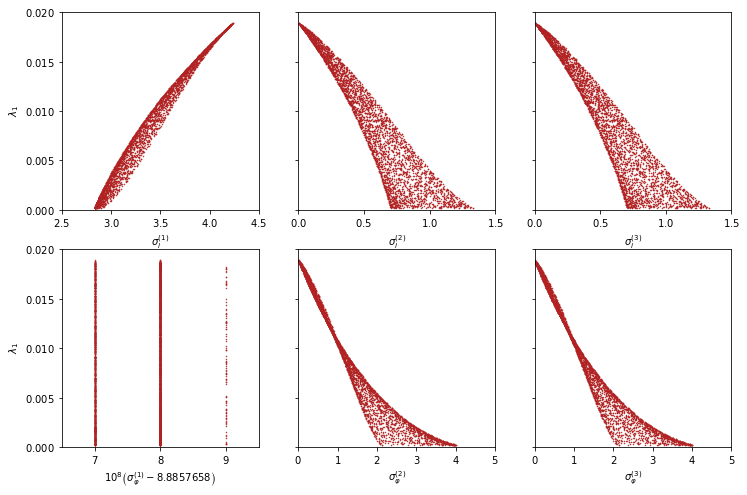

In [36]:
fig, ax = plt.subplots(
    num = 'Sample: singular values, lambda_0',
    figsize = (12.0, 8.0),
    nrows = 2,
    ncols = 3,
    sharex = False,
    sharey = True
)

lim = (
    (
        (2.5, 4.5),
        (0.0, 1.5),
        (0.0, 1.5)
    ),
    (
        (8.885765865, 8.885765895),
        (0.0, 5.0),
        (0.0, 5.0)
    )
)

ticks = (
    (
        (2.5, 3.0, 3.5, 4.0, 4.5),
        (0.0, 0.5, 1.0, 1.5),
        (0.0, 0.5, 1.0, 1.5)
    ),
    (
        (8.88576587, 8.88576588, 8.88576589),
        (0.0, 1.0, 2.0, 3.0, 4.0, 5.0),
        (0.0, 1.0, 2.0, 3.0, 4.0, 5.0)
    )
)

ticklabels = (
    (
        (
            "$ 2.5 $",
            "$ 3.0 $",
            "$ 3.5 $",
            "$ 4.0 $",
            "$ 4.5 $"
        ),
        (
            "$ 0.0 $",
            "$ 0.5 $",
            "$ 1.0 $",
            "$ 1.5 $"
        ),
        (
            "$ 0.0 $",
            "$ 0.5 $",
            "$ 1.0 $",
            "$ 1.5 $"
        )
    ),
    (
        (
            "$ 7 $",
            "$ 8 $",
            "$ 9 $"
        ),
        (
            "$ 0 $",
            "$ 1 $",
            "$ 2 $",
            "$ 3 $",
            "$ 4 $",
            "$ 5 $"
        ),
        (
            "$ 0 $",
            "$ 1 $",
            "$ 2 $",
            "$ 3 $",
            "$ 4 $",
            "$ 5 $"
        )
    )
)

for i in range(3):
    ax[0, i].plot(
        df_sample["sv_edge_{ind:d}".format(ind = i)],
        df_sample.l_0 ** -1,
        color = 'firebrick',
        linestyle = 'None',
        marker = '.',
        ms = 1
    )

    ax[0, i].set_xlabel(
        "$ \\sigma_{{l}}^{{\\left( {ind:d} \\right)}} $".format(ind = i + 1)
    )
try:
    del i
except (NameError, UnboundLocalError):
    pass

for i in range(3):
    ax[1, i].plot(
        df_sample["sv_angle_{ind:d}".format(ind = i)],
        df_sample.l_0 ** -1,
        color = 'firebrick',
        linestyle = 'None',
        marker = '.',
        ms = 1
    )

    ax[1, i].set_xlabel(
        (
            "$ \\sigma_{{\\varphi}}^{{\\left( {ind:d} \\right)}} $" if i
                else "$ 10^{{8}} \\left( \\sigma_{{\\varphi}}^{{\\left( "
                    "{ind:d} \\right)}} - 8.8857658 \\right) $"
        ).format(ind = i + 1)
    )
try:
    del i
except (NameError, UnboundLocalError):
    pass

for i in range(2):
    ax[i, 0].set_ylabel("$ \\lambda_{1} $")
try:
    del i
except (NameError, UnboundLocalError):
    pass

for i in range(2):
    for j in range(3):
        ax[i, j].set_xticks(ticks[i][j])
        ax[i, j].set_yticks((0.000, 0.005, 0.010, 0.015, 0.020))

        ax[i, j].set_xticklabels(ticklabels[i][j])
        ax[i, j].set_yticklabels(
            (
                "$ 0.000 $",
                "$ 0.005 $",
                "$ 0.010 $",
                "$ 0.015 $",
                "$ 0.020 $"
            )
        )

        ax[i, j].set_xlim(lim[i][j])
        ax[i, j].set_ylim((0.0, 0.02))
    try:
        del j
    except (NameError, UnboundLocalError):
        pass
try:
    del i
except (NameError, UnboundLocalError):
    pass

del lim
del ticks
del ticklabels

fig.savefig('../sv-lambda.pdf')

plt.show()
